In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv("challenger.csv")
df

,o_ring_ct,O.ring.failures,temperature,pressure,launch_id
0,6,0,66,50,1
1,6,1,70,50,2
2,6,0,69,50,3
3,6,0,68,50,4
4,6,0,67,50,5
5,6,0,72,50,6
6,6,0,73,100,7
7,6,0,70,100,8
8,6,1,57,200,9
9,6,1,63,200,10


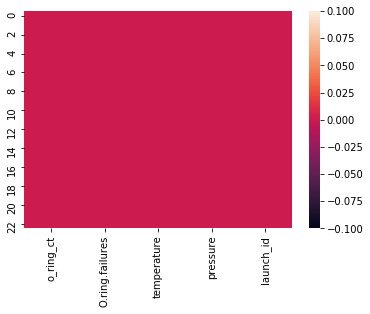

In [4]:
sns.heatmap(df.isnull())

In [13]:
x = df.iloc[:,2:3].values
y = df.iloc[:,1:2].values

In [14]:
y

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=int64)

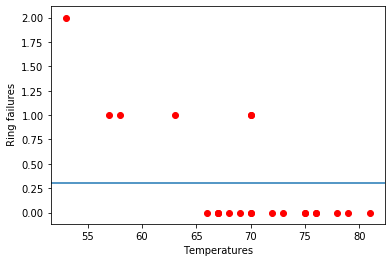

In [22]:
plt.scatter(x,y,color='red')
plt.axhline(y.mean())
plt.ylabel(" Ring failures")
plt.xlabel("Temperatures")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [73]:
x_train

array([[70],
       [70],
       [67],
       [69],
       [76],
       [73],
       [70],
       [70],
       [67],
       [66],
       [75],
       [58],
       [76],
       [63],
       [57],
       [67],
       [78],
       [72]], dtype=int64)

In [74]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
y_pred = reg.predict(x_test)
y_pred

array([[-0.00903378],
       [-0.30125687],
       [ 0.33189317],
       [ 1.0624509 ],
       [-0.20384918]])

In [76]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
accuracy

0.6495177558531813

In [88]:
temp = 45
pred1 = reg.predict([[temp]])
print(f"Ring failure for {temp} degrees is {pred1}")

Ring failure for 45 degrees is [[1.4520817]]
